<a href="https://www.kaggle.com/code/isaacokereke/bankruptcy-predictions?scriptVersionId=112612299" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import  ConfusionMatrixDisplay
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [2]:
df=pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")
df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


#Let us check out the "Bankrupt?" column to know total number of company that are bankrupt and the ones that are not

In [3]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

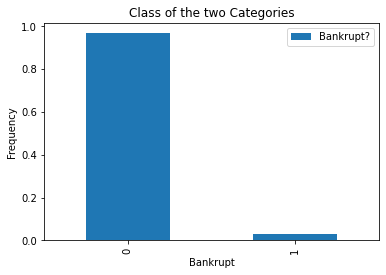

In [4]:
df["Bankrupt?"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel ="Bankrupt",
    ylabel="Frequency",
    title ="Class of the two Categories"
)
plt.legend();

This project is Classification problem and we can see that the two classes are not balanced. The number of company that is not bankrupt is far more than the company that is bankrupt.Modeling this as it is  will tend towards "Not Bankrupt(0)" than it will for "Bankrupt(1)" and that will work against our Algorithm.We will need RandomOverSampler or  RandomUnderSampler class to normalize the data.

<AxesSubplot:>

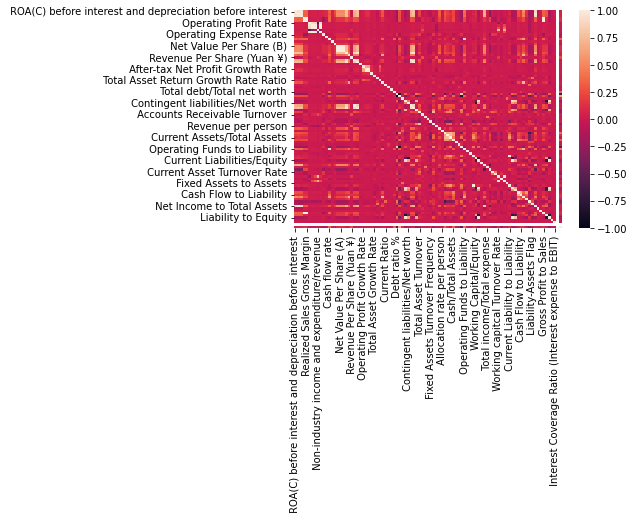

In [5]:
corr =df.drop(columns="Bankrupt?").corr()
sns.heatmap(corr)

Split Data 

In [6]:
target ="Bankrupt?"
X =df.drop(columns=target)
y =df[target]
print(X.shape)
print(y.shape)

(6819, 95)
(6819,)


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)
X_train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
3951,0.398918,0.440362,0.438782,0.598430,0.598430,0.998690,0.796952,0.808904,0.303343,0.781130,...,0.730118,0.000842,0.623282,0.598425,0.811333,0.330911,0.026729,0.564845,1,0.011953
1696,0.480866,0.546991,0.529953,0.595994,0.594863,0.998926,0.797466,0.809373,0.303749,0.781622,...,0.805230,0.007207,0.624691,0.595993,0.840578,0.276414,0.026797,0.565186,1,0.066087
6454,0.331595,0.376799,0.372183,0.599115,0.599115,0.998665,0.796480,0.808509,0.302571,0.780689,...,0.707830,0.000938,0.623651,0.599116,0.820645,0.299786,0.026744,0.564925,1,0.014088
1857,0.462926,0.504034,0.507950,0.621024,0.621024,0.998693,0.797107,0.809050,0.303609,0.781296,...,0.779725,0.000672,0.623869,0.621023,0.839033,0.277012,0.026699,0.564679,1,0.051763
3295,0.531760,0.562582,0.575994,0.611576,0.611576,0.999121,0.797501,0.809413,0.303400,0.781681,...,0.809775,0.000557,0.624058,0.611572,0.841063,0.278731,0.027301,0.566798,1,0.034138


In [8]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over =over_sampler.fit_resample(X_train,y_train)
print("Shape of the X_train:",X_train.shape)
print("Shape of the y_train:",y_train.shape)


Shape of the X_train: (5455, 95)
Shape of the y_train: (5455,)


In [9]:
under_sampler = RandomOverSampler(random_state=42)
X_train_under, y_train_under =under_sampler.fit_resample(X_train,y_train)
print("Shape of the X_train:",X_train_under.shape)
print("Shape of the y_train:",y_train_under.shape)


Shape of the X_train: (10562, 95)
Shape of the y_train: (10562,)


In [10]:
# Fit on `X_train`, `y_train`
model_reg =make_pipeline(
    SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train,y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under,y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over =make_pipeline(
    SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [11]:
# Base Line Accuracy
base_accu =y_train.value_counts(normalize=True).max()
print(round(base_accu,2))

0.97


In the code below ,we want to evaluate the performance of various models 

In [12]:
for m in [model_reg, model_under, model_over]:
    acc_train =m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9611
Training Accuracy: 1.0
Test Accuracy: 0.956
Training Accuracy: 1.0
Test Accuracy: 0.956


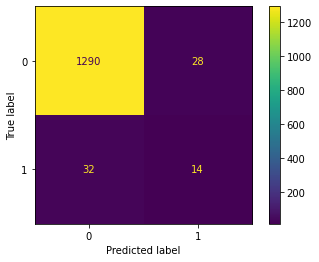

In [13]:
#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_under,X_test,y_test)

We want to chech feature importance to know which columns has more effect.

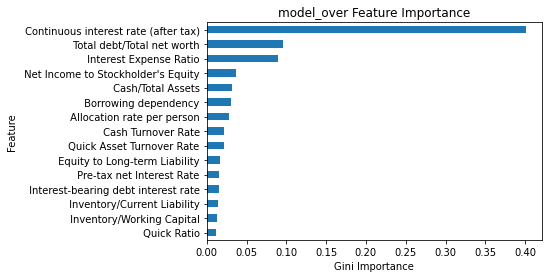

In [14]:
# Get importances
importances =model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp =pd.Series(importances,index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

From horizomtal horizontal bar above,we can see that continous horizontal rate (after) had more effect on our Algorithm